# K-Nearest Neighbor (k-NN) K近邻法
### A type of lazy learning

## Overview

k-NN算法是一种简单，直观的分类与回归方法，这里主要讲述k-NN在分类问题中的运用。    
这是一个没有很明显的学习过程的机器学习算法，相应的，它利用了训练集对特征向量空间进行了划分，从而达到分类的目的。    
它的核心原理为：**给定一个训练数据集，对于新的输入实例，在训练数据集中找到与该实例距离最近的k个实例，这k个实例的多数属于某个类别，就把该输入实例分为这个类别。**    
简单来说，k-NN算法实现的就是一个物以类聚的效果，即对于每个分类样本类别的选择由距离此样本最近的k个样本的类别而决定。

## Explain

从k-NN算法的原理不难看出，此模型具有三个基本要素：**距离的测量**，**k值的选择**和**分类决策的规则**。下面会对这三个要素分别进行一下分析和理解：

**距离的测量**：距离，在k-NN算法中反映了实例之间的相似程度。通常习惯使用Euclidean Distance（欧氏距离），当然也可以用Minkowski Distance，Manhattan Distance等距离计算方式。一个通用公式为：$$L_p(x_i, x_j) = (\sum_{l=1}^{n}{\vert{x_i^{(l)} - x_j^{(l)}}\vert}^p)^\frac{1}{p}$$   其中， 
$$L_p(x_i, x_j):两点之间的距离$$
$$x_i = (x_i^{(1)}, x_i^{(2)}, x_i^{(3)}, ..., x_i^{(n)})^T$$
$$x_j = (x_j^{(1)}, x_j^{(2)}, x_j^{(3)}, ..., x_j^{(n)})^T$$
$$p: p\geq1; 当p=1时，即为Manhattan Distance；当p=2时，即为Euclidean Distance$$

**k值的选择**：k值代表着最终参与决策的实例的个数， 它的选择会对k-NN的结果产生重大的影响。    
如果选择了过小的k值，近似误差（approximation error）会减小，但是估计误差（estimation error）会增大。其实很好理解，假设使用极端情况，k=1（1-NN算法也叫最近邻算法），那么每次分类的结果便是离的最近的实例的类别。在此情况下，如果恰好离得最近的实例是噪声的话，那么预测的结果便是错误的。换句话说，由于k的选值过小，整个样本空间会被分割的更细，从而导致模型变复杂出现过拟合。    
相应的，选择了过大的k值，估计误差便会减小，但是近似误差则会增大，因为此时对样本空间分割的过于粗糙，模型过于简单，使得一些不相似的实例也参与进了最终决策，从而导致预测错误。   
那么究竟该如何选取k值呢？一般来说，要找一个较小的数。这个问题有各种各样的说法，比如优先取3，5，7，9等较小基数，还有说凭经验玄学的。其实，最科学的方法为交叉验证法，说白了，多试几个数，找到效果最好的即可。

**分类决策的规则**：最后，确定了最后参与决策的实例之后，便是规定决策的规则了。一般来说，采用多数表决法，就是少数服从多数；这样其实做到了经验风险最小化。

## Programming

### k-NN法 - 鸢尾花分类模型

这个模型的目的是为了检测一个鸢尾花具体的分类，共有三类：'Iris Setosa'或'Iris Versicolour'或'Iris Virginica'。该模型由k-NN算法实现。
数据集来自UCI机器学习项目，可在此处下载：https://archive.ics.uci.edu/ml/datasets/iris

#### Step 1:  Getting, understanding, and cleaning the dataset

#### Importing the dataset

In [1]:
import matplotlib.pyplot as plt # plotting utilities 
%matplotlib inline
import numpy as np 
import math
import operator
from collections import Counter
import pandas as pd  # To read in the dataset we will use the Panda's library
df = pd.read_csv('iris.csv', header=None, names = ["sepal length[cm]","sepal width[cm]","petal length[cm]", "petal width", "label"])

# Next we observe the first 5 rows of the data to ensure everything was read correctly
df.head()

,sepal length[cm],sepal width[cm],petal length[cm],petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Data Preproccessing
为了方便处理，我们将Iris-setosa的label设为0， Iris-versicolor设为1，Iris-virginica设为2。同时，这里只使用了两个feature以简化代码过程，有兴趣的可以把所有feature都用上。

In [2]:
df['label'] = df.label.map({'Iris-setosa': 0,
              'Iris-versicolor': 1,
              'Iris-virginica': 2})
df.head()# Again, lets observe the first 5 rows to make sure everything worked before we continue

,sepal length[cm],sepal width[cm],petal length[cm],petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
from sklearn.model_selection import train_test_split
names = ["sepal length[cm]","petal width"]
#After completing the assignment, try your code with all the features
#names = ["sepal length[cm]","sepal width[cm]","petal length[cm]", "petal width"]
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df[names],df['label'], random_state=0)

X_train=df_X_train.to_numpy()
X_test=df_X_test.to_numpy()
y_train=df_y_train.to_numpy()
y_test=df_y_test.to_numpy()

#Looking at the train/test split
print("The number of training examples: ", X_train.shape[0])
print("The number of test exampels: ", X_test.shape[0])

print("The first four training labels")
print(y_train[0:4])

print("The first four iris' measurements")
print(X_test[0:4])

The number of training examples:  112
The number of test exampels:  38
The first four training labels
[1 1 2 0]
The first four iris' measurements
[[5.8 2.4]
 [6.  1. ]
 [5.5 0.2]
 [7.3 1.8]]


#### Visualizing the data set

来看一下目前数据的分布情况。

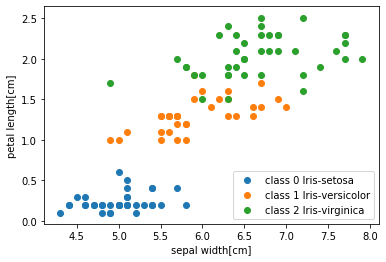

In [4]:
iris_names=['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(0,3):
    plt.scatter(X_train[y_train == i, 0],
                X_train[y_train == i, 1],
            marker='o',
            label='class '+ str(i)+ ' '+ iris_names[i])

plt.xlabel('sepal width[cm]')
plt.ylabel('petal length[cm]')
plt.legend(loc='lower right')

plt.show()

#### Step 2: Implementing the algorithm and training the model

In [5]:
# Distance 
def euclidean_distance(x1, x2):
    distance = 0
    length = len(X_test[0])
    
    for i in range(length):
        distance += pow((x1[i] - x2[i]), 2)
        
    return math.sqrt(distance)

In [6]:
# Find k neighbors
def get_neighbors( X_train, y_train, x_test, k, distance):
    distance_set = []
    neighbors = []
    
    for i in range(len(X_train)):
        dist = distance(x_test, X_train[i])
        distance_set.append((X_train[i], dist, y_train[i]))

    distance_set.sort(key=operator.itemgetter(1, 2))
    #print(distance_set)
    
    for i in range(k):
        neighbors.append(distance_set[i][2])
    
    return neighbors

In [7]:
# Do majority voting
def majority_vote(neighbors):
    votes = {}
    for i in neighbors:
        if i in votes:
            votes[i] += 1
        else:
            votes[i] = 1
    
    return max(votes.items(), key=operator.itemgetter(1))[0]

In [8]:
def knn_prediction(X_test, X_train, y_train, k, distance):
    predictions = []
    for i in range(len(X_test)):
        neighbors = get_neighbors(X_train, y_train, X_test[i], k, distance)
        vote = majority_vote(neighbors)
        predictions.append(vote)
    return predictions

In [9]:
def get_accuracy(y_test, predictions):
    correct = 0.0
    incorrect= []
    
    for i in range(len(y_test)):
        if y_test[i] == predictions[i]:
            correct += 1
        else:
            incorrect.append(i) 
            
    return correct / float(len(y_test)), incorrect

以上，便是k-NN算法的实现了，下面来选取几个不同的k值来比较一下预测结果。

In [11]:
# K = 1
k1_prediction = knn_prediction(X_test, X_train, y_train, 1, euclidean_distance)
k1_accuracy = get_accuracy(y_test, k1_prediction)[0]
k1_classified = get_accuracy(y_test, k1_prediction)[1]
print(k1_accuracy)
# Wrong classified data
print(k1_classified) 

0.9473684210526315
[10, 16]


In [12]:
# K = 3
k3_prediction = knn_prediction(X_test, X_train, y_train, 3, euclidean_distance)
k3_accuracy = get_accuracy(y_test, k3_prediction)[0]
k3_classified = get_accuracy(y_test, k3_prediction)[1]
print(k3_accuracy)
print(k3_classified) 

0.9736842105263158
[10]


In [13]:
# K = 5
k5_prediction = knn_prediction(X_test, X_train, y_train, 5, euclidean_distance)
k5_accuracy = get_accuracy(y_test, k5_prediction)[0]
k5_classified = get_accuracy(y_test, k5_prediction)[1]
print(k5_accuracy)
print(k5_classified)

0.9736842105263158
[10]


可以看出，当k = 1时，错误分类了两个数据10和16号。当选取k = 3或5时，准确率提升至97.4%。那便可以认为k取3或者5都可以收到一个不错的模型。

另外，这里实验一下采取不同的距离公式时产生的不同结果，以曼哈顿距离(Manhattan Distance)为例。

In [14]:
# Manhattan Distance
def manhattan_distance(x1, x2):
    distance = 0
    length = len(X_test[0]) - 1
    
    for i in range(length):
        distance += abs(x1[i] - x2[i])
        
    return distance

# K = 1
k1manhattan_prediction = knn_prediction(X_test, X_train, y_train, 1, manhattan_distance)
k1manhattan_accuracy = get_accuracy(y_test, k1manhattan_prediction)[0]
print("k1: ", k1manhattan_accuracy)

# K = 3
k3manhattan_prediction = knn_prediction(X_test, X_train, y_train, 3, manhattan_distance)
k3manhattan_accuracy = get_accuracy(y_test, k3manhattan_prediction)[0]
print("k3: ", k3manhattan_accuracy)

# K = 5
k5manhattan_prediction = knn_prediction(X_test, X_train, y_train, 5, manhattan_distance)
k5manhattan_accuracy = get_accuracy(y_test, k5manhattan_prediction)[0]
print("k5: ", k5manhattan_accuracy) 

k1:  0.631578947368421
k3:  0.5526315789473685
k5:  0.6052631578947368


可以看出，曼哈顿距离得到的准确率远远不如欧氏距离。所以，一般情况下，k-NN模型的距离都由欧氏距离来计算。

#### Step 3: Using build-in library
其实Sklearn库里已经包含了k-NN的实现方法，可以直接拿来用，方法如下：

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Try a loop to go through different K value
k_range = range(1, 10)
scores = {}
score_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    score_list.append(metrics.accuracy_score(y_test, y_pred))

0.9736842105263158


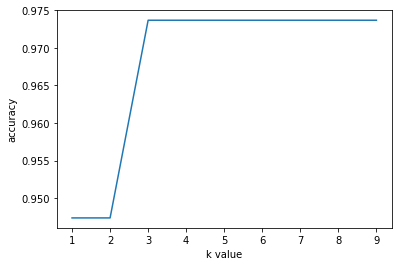

In [21]:
plt.plot(k_range, score_list)
plt.xlabel("k value")
plt.ylabel("accuracy")

print(max(score_list))

通过这个方法，便简单明了的看出，当k = 3时准确率就达到了最高点，所以k取3即可。

## Conclusion

本文简单介绍了什么是k-NN模型，并且通过一个经典的小项目展示了其实现的方法。近些年，k-NN算法有了一些拓展的使用，比如和DNN结合使用的Deep k-NN等。如果感兴趣，可以深入学习一番。

In the end, thanks for reading and let me know your suggestions/corrections if any.

Bye~